We begin by importing the same libraries as in the first notebook of the sequence. Remember to make sure that you have these all installed in your environment by the end of your first lab. It is perfectly fine if someone walks you through this, but it is essential that this is done to complete the rest of the work for this semester.

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris

Next we load the iris dataset, just as in the last notebook.

In [12]:
iris_data = load_iris()
target_data = np.reshape(iris_data.target, (150, 1))
all_iris_data = np.concatenate((iris_data.data, target_data), axis = 1)

iris_df = pd.DataFrame(all_iris_data,
                       columns = ['sepal length', 'sepal width',
                                  'petal length', 'petal width', 'target'])

In [13]:
# take a look at the data we imported
iris_df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In the future, when you deal with larger datasets, you can save them to a csv or pickle file and access that later. You will need to specify the path your file is saved to and later accessed from. This path will vary for each of you. If this is new to you, and you have some free time during the lab, you could ask someone to show you how this works.

Now that we have the data, let's get to our main task for today: we will train a classification model to predict the target value. Remember that this is the fifth value in each row, classifying the flower in one of three possible classes: setosa (denoted by 0), versicolor (denoted by 1), or virginica (denoted by 2). For example, inspect the data in the first row of the dataset and make sure you know what each value corresponds to.

In [6]:
# Q1: print the data in row 0. What do the numbers you see represent?

We can also print some more information on the range of the variables.

In [5]:
iris_df.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


There are several possible approaches to create a classification model. If you have done something like this before, you could give this a try yourself and then come back if you'd like to see a possible solution. Multiple different solutions can be correct.

It is useful to start by taking a closer look at the data to get some insight. We will begin by generating some plots using a library called seaborn. Again, this will need to be installed before you can import it. Once you have generated your plots, spend some time looking at them. Make sure you can explain what each plot represents. As always, ask a TA or classmate if you are unsure.

In [17]:
# pip install seaborn

In [8]:
import seaborn as sns

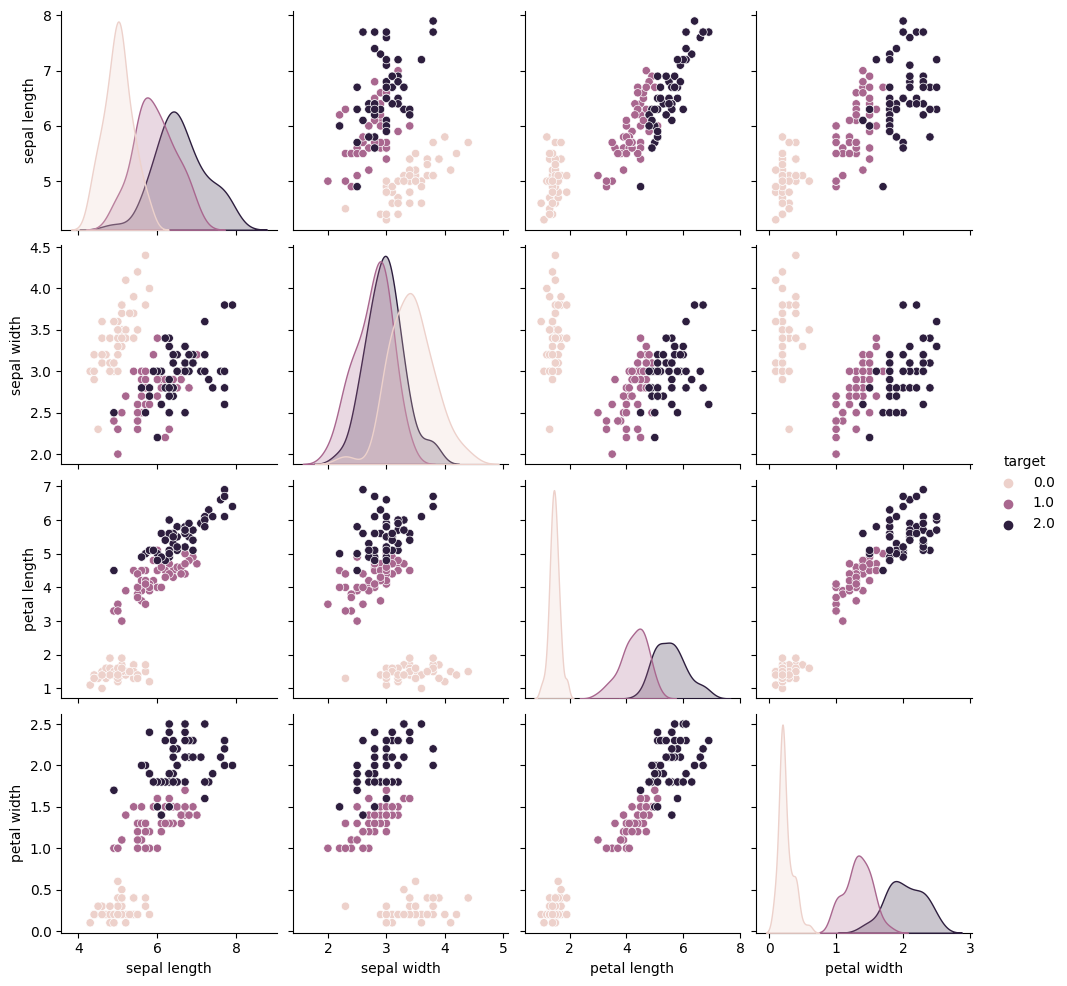

In [16]:
sns.pairplot(iris_df, hue='target')

Before we begin training, we create datasets called X consisting of input variables and y consisting of the target variable.

In [21]:
X = iris_df.drop(['target'], axis=1)
y = iris_df['target']

In [22]:
# Q3: feel free to print these to check that what we have created is what we expected

In order to train a model, one usually splits the data into two groups: we use part of the data for the actual training process ("training set") and part of it to test our model afterwards ("testing set"). Sometimes a third group is considered, referred to as validation set. We will not make use of it now, but if you have time and haven't encountered this before you could look this up as it can be very useful for more complicated models.

To split our data into training and testing sets, we use a library called train_test_split. Let's import it first.

In [18]:
from sklearn.model_selection import train_test_split

Train_test_split automatically shuffles the data before it is divided into two groups by setting shuffle = True.

Q2: Can you see why this is important for us?

We will use train_test_split with test_size = 0.3 to split the data into a training set consiting of 70% of the data and a testing set consisting of 30% of the data. I will also set random_state = 123. This just ensures that if we want to replicate the split, the same two sets are created. Since the split is done randomly, without setting this parameter you'll have different results every time you repeat this.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=123)

In [ ]:
# Q4: once again, if you haven't done this a lot before, print the training and testing sets we
# just created to make sure they look the way you expect.

We will use a SVC (Support Vector Classifier) algorithm to create our model. For now, you may treat this as a black box, but if you are curious to learn a little bit more about why this works, you can read more about this online. If you are already familiar with these ideas, you can also explore other supervised learning algorithms, and maybe try a few and see which gives you the best results. Many supervised learning algorithms, including SVC, can be implemented easily in sklearn. Let's start by importing the library that allows us to train a SVC.

In [33]:
from sklearn.svm import SVC

We can now create a model by specifying a few parameters. For now, you can use the parameters I chose, or you can head here https://scikit-learn.org/stable/modules/svm.html to read more about what each of these does and try out a few other combinations. You may even find one that gives better results than this!

In [34]:
model = SVC(C=1, kernel='rbf', tol=0.001)

We're ready to train our model using our training data.

In [35]:
model.fit(X_train, y_train)

SVC(C=1)

It is now very important that we look back and evaluate our model, to see how well it is performing. Luckily, sklearn gives us several built in tools that we can use to do this. Let's import a few. You'll find more information on each of them here:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [41]:
from sklearn.metrics import accuracy_score, mean_squared_error

Let's apply the model to our testing set, creating a vector of predicted values. These can then be compared with the true values in y_test.

In [38]:
predictions = model.predict(X_test)

Let's start computing the accuracy score.

In [39]:
print('Accuracy score: ', accuracy_score(y_test, predictions))

Accuracy score:  0.9111111111111111


Now let's look at the mean squared error.

In [42]:
print('MSE: ', mean_squared_error(y_test, predictions))

MSE:  0.08888888888888889


Q5: Take a second to look at your accuracy score and mean squared error. What do these numbers represent?

Hopefully this gave you an overview of what's involved in preparing the data, training and evaluating a model. We encourage you to use this as a starting point for discussion with your TAs and classmates and for further readings on the parts of this process that you are less familiar with.

In [19]:
# ANS1:
# iris_df.loc[[0]]
## sepal length, sepal width, petal length and petal width have numerical values,
## the target value 0.0 means that the flower in row 0 is a setosa

ANS 2: Take a look at the dataframe iris_df. All data is ordered by the target value: we have 50 setosa first, then 50 versicolor, then 50 virginica. If the data wasn't shuffled before splitting it, we'd have an uneven representation of the three classes in the training and testing sets. For example, let's say we take the first two thirds of data for training and the remaining third for testing. We'll end up with a trainign set made up of all setosa and all versicolor data points, and a testing set made up of only virginica data points. This can't be good to train a model that's supposed to be able to recognise all three classes.

In [25]:
# ANS3:
# print(X)
# print(y)

In [32]:
# ANS4:
# print("X_train:")
# print(X_train)
# print("X_test:")
# print(X_test)
# print("y_train:")
# print(y_train)
# print("y_test:")
# print(y_test)

ANS 5: The exact values depend on some choices made during training, so they will vary from run to run. You probably got a value or roughly 0.9 or a little higher for accuracy. An accuracy of 0.9 means that our model correctly classifies 90% of the data. You also probably got a value slightly less than 0.1 for MSE, which is consistent with about 90% of our predictions being correct.